**Estimating the price of a house**

This machine learning model estimates the price of a house (in thousands of $) based on four of its properties. The model is built using `linear regression`. The list of feature(s) and target(s) for the model are detailed below:

**Feature(s)**
- Square footage of the house (in units of 1000 sq.ft)
- Number of bedrooms
- Number of bathrooms
- Number of stories in the house

**Target(s)**
- Price of the house (units of million dollars)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from data_processing import DataProcessing

The `compute_cost` function calculates the cost value based on the following parameters:
- `x` :: List of all feature values (2D - vector of dimensions (m, n)).
- `y` :: List of all target values (1D - vector of dimensions (m,)).
- `w` :: Model parameter value (1D - vector of dimensions (n,)).
- `b` :: Model parameter value (scalar).

In [2]:
def compute_cost(x, y, w, b):
    y_hat = np.dot(x, w)
    y_hat = y_hat + b
    diff = np.square(y_hat - y)
    cost = np.mean(diff)
    cost = cost / 2
    return cost

The `compute_gradient` function  calculates the quantity by which the model parameters - w and b, must be reduced to minimize the value of the cost function. It returns  a tuple - `(dj_dw, dj_db)`, where 
- `dj_dw` :: quantity by which value of `w` must be decreased (1D - vector of dimensions (n,)).
- `dj_db` :: quanity by which value of `b` must be decreased (scalar).

In [3]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    y_hat = np.dot(x, w)
    y_hat = y_hat + b
    diff = y_hat - y
    dj_db = np.mean(diff)
    dj_dw = np.dot(x.T, diff)
    dj_dw = (1 / m) * dj_dw
    return dj_dw, dj_db

In [4]:
dp = DataProcessing("price", "area", "bedrooms", "bathrooms", "stories")
xi, yi = dp.normalize_features(), dp.yi.copy()
(m, n) = xi.shape
alpha = 0.005
epoch = 10000
w = np.random.randn(n)
b = np.random.randn()
print(f"m = {m}")
print(f"n = {n}")
print(f"alpha = {alpha}")
print(f"Number of iterations = {epoch}")
print(f"w = {w}")
print(f"b = {b}")

m = 436
n = 4
alpha = 0.005
Number of iterations = 10000
w = [ 1.70995673 -0.89972628  0.03530791 -0.85705758]
b = 0.18095344387828124


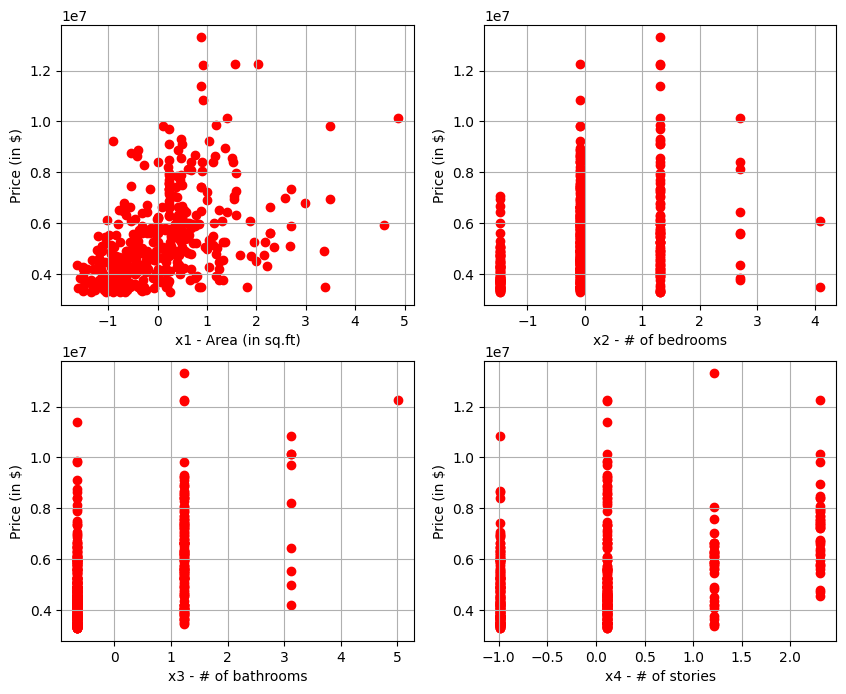

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axs[0, 0].scatter(xi[:,0], yi, c='r')
axs[0, 0].set_xlabel("x1 - Area (in sq.ft)")
axs[0, 0].set_ylabel("Price (in $)")
axs[0, 0].grid()

axs[0, 1].scatter(xi[:,1], yi, c='r')
axs[0, 1].set_xlabel("x2 - # of bedrooms")
axs[0, 1].set_ylabel("Price (in $)")
axs[0, 1].grid()

axs[1, 0].scatter(xi[:,2], yi, c='r')
axs[1, 0].set_xlabel("x3 - # of bathrooms")
axs[1, 0].set_ylabel("Price (in $)")
axs[1, 0].grid()

axs[1, 1].scatter(xi[:,3], yi, c='r')
axs[1, 1].set_xlabel("x4 - # of stories")
axs[1, 1].set_ylabel("Price (in $)")
axs[1, 1].grid()

In [6]:
epochs = np.empty(0, dtype='int')
costs = np.empty(0, dtype='float')
W_final = np.zeros(n, dtype='float')
b_final = float(0)
min_cost = float('inf')
for i in range(1, epoch + 1):
    dj_dw, dj_db = compute_gradient(xi, yi, w, b)
    w = w - (alpha * dj_dw)
    b = b - (alpha * dj_db)
    cost = compute_cost(xi, yi, w, b)
    epochs = np.append(epochs, i)
    costs = np.append(costs, cost)
    if i % (math.floor(epoch / 10)) == 0:
        print(f"Iteration {i} :: cost = {cost} :: w = {w} :: b = {b}")
    
    if cost < min_cost:
        min_cost = cost
        b_final = b
        W_final = np.copy(w)
print(f"Minimum cost = {min_cost} for w = {W_final} and b = {b_final}")

Iteration 1000 :: cost = 788279215681.6857 :: w = [716260.50577224 114606.96602086 576983.87808227 433453.37138558] :: b = 5242647.830054236
Iteration 2000 :: cost = 787567847134.6921 :: w = [720880.60466765 101469.94161354 582972.43695708 439914.44584431] :: b = 5277532.242781242
Iteration 3000 :: cost = 787567645921.4095 :: w = [720933.49127033 100892.13584192 583269.58973785 440210.72460876] :: b = 5277764.362567413
Iteration 4000 :: cost = 787567645567.6086 :: w = [720934.39449953 100866.22249587 583284.26590479 440223.14530238] :: b = 5277765.907085178
Iteration 5000 :: cost = 787567645566.8839 :: w = [720934.41152838 100865.05231637 583284.97409933 440223.66677677] :: b = 5277765.917362349
Iteration 6000 :: cost = 787567645566.8824 :: w = [720934.41168509 100864.99930699 583285.00770309 440223.68900733] :: b = 5277765.917430737
Iteration 7000 :: cost = 787567645566.8824 :: w = [720934.41167294 100864.99690079 583285.00927929 440223.68996938] :: b = 5277765.9174311
Iteration 8000 

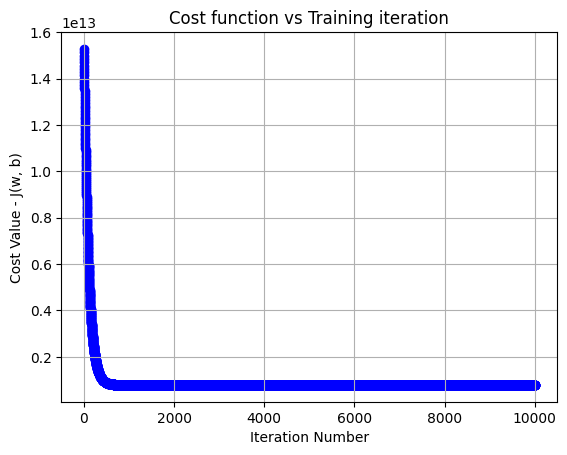

In [7]:
fig, ax = plt.subplots()
ax.set_title("Cost function vs Training iteration")
ax.scatter(epochs, costs, c='b')
ax.set_ylabel("Cost Value - J(w, b)")
ax.set_xlabel("Iteration Number")
ax.grid()